In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
outliers_df = pd.read_csv('outliers.csv')
outliers_df.drop(columns=["Unnamed: 0"],inplace=True)

In [3]:
outliers_df["prev_sold_year"] = pd.to_datetime(outliers_df["prev_sold_date"], format='%Y-%m-%d').dt.year
outliers_df.drop(columns=["prev_sold_date"],inplace=True)
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bed             2702 non-null   float64
 1   bath            2702 non-null   float64
 2   acre_lot        2702 non-null   float64
 3   zip_code        2702 non-null   float64
 4   house_size      2702 non-null   float64
 5   price           2702 non-null   float64
 6   prev_sold_year  2702 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 147.9 KB


In [4]:
groupby_zipcode = outliers_df.groupby(["zip_code"])["zip_code"].count().sort_values(ascending=False)
groupby_zipcode_df = pd.DataFrame(groupby_zipcode).rename(columns={"zip_code":"count"}).reset_index()
first_zipcode = groupby_zipcode_df.iloc[0]["zip_code"]
first_zipcode

6010.0

In [5]:
one_zipcode_df = outliers_df[outliers_df["zip_code"].isin([first_zipcode])]

In [6]:
features = ["acre_lot","bed","bath","house_size","prev_sold_year","price"]
num_features_to_select = len(features)-1
random_state_value = 42

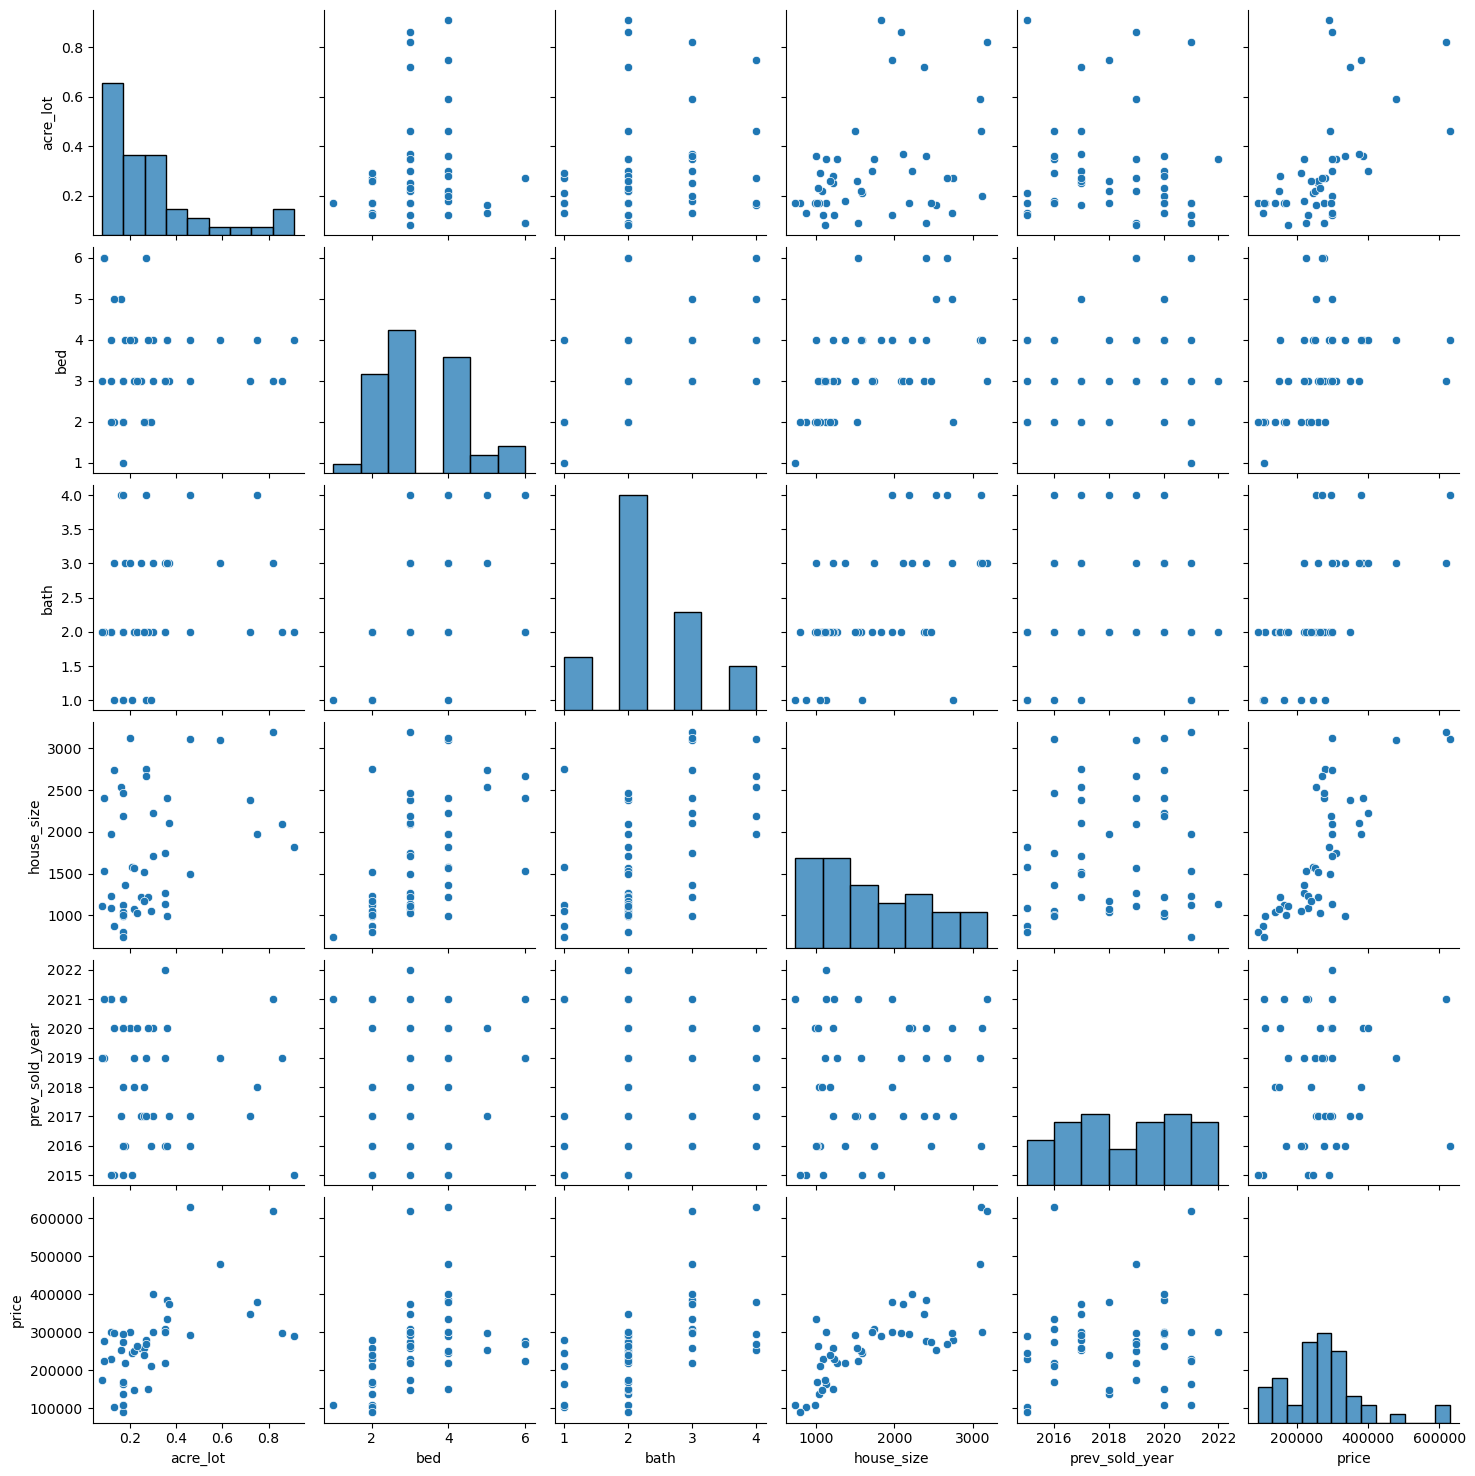

In [7]:
sns.pairplot(one_zipcode_df[features])

In [8]:
groupby_zipcode

zip_code
6010.0    46
6902.0    44
6606.0    43
6790.0    41
6824.0    40
          ..
6793.0     1
6092.0     1
6782.0     1
6089.0     1
6058.0     1
Name: zip_code, Length: 245, dtype: int64